# [DistilBERT, a distilled version of BERT: smaller, faster, cheaper and lighter](https://arxiv.org/abs/1910.01108)

In this lecture, we will explore the architecture of DistilBERT, its key components, and how it can be utilized for various natural language processing tasks. Additionally, we'll discuss its advantages, limitations, and provide hands-on examples to showcase its effectiveness.

Reference : [The Theory](https://towardsdatascience.com/distillation-of-bert-like-models-the-code-73c31e8c2b0a) | [Code](https://towardsdatascience.com/distillation-of-bert-like-models-the-theory-32e19a02641f)

In [1]:
# import os
# # Set GPU device
# os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# os.environ['http_proxy']  = 'http://192.41.170.23:3128'
# os.environ['https_proxy'] = 'http://192.41.170.23:3128'

In [2]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which

In [3]:
!pip install peft

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [4]:
from peft import get_peft_model, LoraConfig, TaskType
import torch.optim as optim
from transformers import get_scheduler


In [5]:
# !pip install datasets --upgrade
import datasets
import transformers
import torch
datasets.__version__, transformers.__version__, torch.__version__

('3.4.1', '4.49.0', '2.6.0+cu124')

In [6]:
import torch.nn as nn
import torch
from tqdm.auto import tqdm
import random, math, time

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

#make our work comparable if restarted the kernel
SEED = 1234
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

cuda


## 1. Loading our MNLI part of the GLUE dataset

In [7]:
# Load the dataset
dataset_name = "OxAISH-AL-LLM/wiki_toxic"
raw_datasets = datasets.load_dataset(dataset_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/4.30k [00:00<?, ?B/s]

wiki_toxic.py:   0%|          | 0.00/4.55k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/35.2M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/8.85M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/17.3M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/6.18M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/127656 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/31915 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/63978 [00:00<?, ? examples/s]

Generating balanced_train split:   0%|          | 0/25868 [00:00<?, ? examples/s]

In [8]:
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['id', 'comment_text', 'label'],
        num_rows: 127656
    })
    validation: Dataset({
        features: ['id', 'comment_text', 'label'],
        num_rows: 31915
    })
    test: Dataset({
        features: ['id', 'comment_text', 'label'],
        num_rows: 63978
    })
    balanced_train: Dataset({
        features: ['id', 'comment_text', 'label'],
        num_rows: 25868
    })
})

In [9]:
# Extract label names from the 'label' column
label_list = list(set(raw_datasets['train']['label']))


In [10]:
label2id = {v: i for i, v in enumerate(label_list)}

In [11]:
label2id

{0: 0, 1: 1}

In [12]:
id2label = {i: v for v, i in label2id.items()}
id2label

{0: 0, 1: 1}

## 2. Model & Tokenization

In [13]:
import numpy as np
num_labels = np.unique(raw_datasets['train']['label']).size
num_labels

2

<img src = "figures/BERT_embed.png" width=500>

In [14]:
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer

teacher_id = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(teacher_id)

teacher_model = AutoModelForSequenceClassification.from_pretrained(
    teacher_id,
    num_labels = num_labels,
    id2label = id2label,
    label2id = label2id,
)

teacher_model

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

## 3. Preprocessing

In [15]:
# def tokenize_function(examples):
#     sentence1_key, sentence2_key = task_to_keys[task_name]
#     args = (
#         (examples[sentence1_key],) if sentence2_key is None else (examples[sentence1_key], examples[sentence2_key])
#     )
#     result = tokenizer(*args, max_length=128, truncation=True)
#     return result

def tokenize_function(examples):
    return tokenizer(
        examples["comment_text"],
        padding="longest",  # Dynamically adjust padding per batch
        truncation=True
    )

tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)



Map:   0%|          | 0/127656 [00:00<?, ? examples/s]

Map:   0%|          | 0/31915 [00:00<?, ? examples/s]

Map:   0%|          | 0/63978 [00:00<?, ? examples/s]

Map:   0%|          | 0/25868 [00:00<?, ? examples/s]

In [16]:
# Remove unused columns
tokenized_datasets = tokenized_datasets.remove_columns(["id", "comment_text"])

In [17]:

#rename column : 'labels'
tokenized_datasets = tokenized_datasets.rename_column("label", "labels")
tokenized_datasets.set_format("torch")
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 127656
    })
    validation: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 31915
    })
    test: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 63978
    })
    balanced_train: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 25868
    })
})

In [18]:
tokenized_datasets['train'][0]['input_ids']

tensor([ 101, 1998, 2008, 1005, 1055, 2025, 1037, 3167, 2886, 1034, 1034, 1029,
         102,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,   

In [19]:
tokenizer.decode(tokenized_datasets['train'][0]['input_ids'])


"[CLS] and that ' s not a personal attack ^ ^? [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]

## 4. Preparing the dataloader

In [20]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
#Data collator that will dynamically pad the inputs received.

In [21]:
# Ensure dataset has the correct splits
if "validation" not in tokenized_datasets:
    tokenized_datasets["validation"] = tokenized_datasets["train"].shuffle(seed=1150).select(range(5000))

if "test" not in tokenized_datasets:
    tokenized_datasets["test"] = tokenized_datasets["train"].shuffle(seed=1150).select(range(5000, 10000))


In [22]:
small_train_dataset = tokenized_datasets["train"].shuffle(seed=1150).select(range(10000))  # 10K samples
small_eval_dataset = tokenized_datasets["validation"].shuffle(seed=1150).select(range(1500))  # 1.5K samples
small_test_dataset = tokenized_datasets["test"].shuffle(seed=1150).select(range(1500))  # 1.5K samples

In [23]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(
    small_train_dataset, shuffle=True, batch_size=32, collate_fn=data_collator)
test_dataloader = DataLoader(
    small_test_dataset, batch_size=32, collate_fn=data_collator)
eval_dataloader = DataLoader(
    small_eval_dataset, batch_size=32, collate_fn=data_collator)


In [24]:

for batch in train_dataloader:
    break

batch['labels'].shape, batch['input_ids'].shape, batch['attention_mask'].shape

(torch.Size([32]), torch.Size([32, 512]), torch.Size([32, 512]))

## 5. Design the model and losses

### 5.1 Teacher Model & Student Model

####  Architecture
In the present work, the student - DistilBERT - has the same general architecture as BERT.
- The `token-type embeddings` and the `pooler` are removed while `the number of layers` is reduced by a factor of 2.
- Most of the operations used in the Transformer architecture `linear layer` and `layer normalisation` are highly optimized in modern linear algebra frameworks.
- our investigations showed that variations on the last dimension of the tensor (hidden size dimension) have a smaller impact on computation efficiency (for a fixed parameters budget) than variations on other factors like the number of layers.
- Thus we focus on reducing the number of layers.

#### Initialize Student Model
- To initialize a new model from an existing one, we need to access the weights of the old model (the teacher).
- In order to get the weights, we first have to know how to access them. We’ll use BERT as our teacher model.

In [25]:
teacher_model.config

BertConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": 0,
    "1": 1
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "0": 0,
    "1": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.49.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

####
- The student model has the same configuration, except the number of layers is reduced by a factor of 2
- The student layers are initilized by copying one out of two layers of the teacher, starting with layer 0.
- The head of the teacher is also copied.

In [26]:
from transformers.models.bert.modeling_bert import BertPreTrainedModel, BertConfig
# Get teacher configuration as a dictionnary
configuration = teacher_model.config.to_dict()
# configuration

In [27]:
# Half the number of hidden layer
configuration['num_hidden_layers'] //= 2
# Convert the dictionnary to the student configuration
configuration = BertConfig.from_dict(configuration)

In [28]:
# Create uninitialized student model
student_model = type(teacher_model)(configuration)
student_model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-5): 6 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, e

- Recursively copies the weights of the (teacher) to the (student).
- This function is meant to be first called on a BertFor... model, but is then called on every children of that model recursively.
- The only part that's not fully copied is the encoder, of which only half is copied.

In [29]:
from transformers.models.bert.modeling_bert import BertEncoder, BertModel
from torch.nn import Module

# def distill_bert_weights(
#     teacher : Module,
#     student : Module,
# ) -> None:
#     """
#     Recursively copies the weights of the (teacher) to the (student).
#     This function is meant to be first called on a BertFor... model, but is then called on every children of that model recursively.
#     The only part that's not fully copied is the encoder, of which only half is copied.
#     """
#     # If the part is an entire BERT model or a BERTFor..., unpack and iterate
#     if isinstance(teacher, BertModel) or type(teacher).__name__.startswith('BertFor'):
#         for teacher_part, student_part in zip(teacher.children(), student.children()):
#             distill_bert_weights(teacher_part, student_part)
#     # Else if the part is an encoder, copy one out of every layer
#     elif isinstance(teacher, BertEncoder):
#         teacher_encoding_layers = [layer for layer in next(teacher.children())] #12 layers
#         student_encoding_layers = [layer for layer in next(student.children())] #6 layers
#         for i in range(len(student_encoding_layers)):
#             student_encoding_layers[i].load_state_dict(teacher_encoding_layers[2*i].state_dict())
#     # Else the part is a head or something else, copy the state_dict
#     else:
#         student.load_state_dict(teacher.state_dict())

#     return model

# Function to copy weights (Odd-layer or Even-layer selection)
def distill_bert_weights(
    teacher: Module,
    student: Module,
    layer_selection: str = "odd"  # "odd" or "even"
) -> None:
    """
    Copies teacher weights to student.
    Selects only odd or even layers from the teacher.
    """
    if isinstance(teacher, BertModel) or type(teacher).__name__.startswith('BertFor'):
        for teacher_part, student_part in zip(teacher.children(), student.children()):
            distill_bert_weights(teacher_part, student_part, layer_selection)

    elif isinstance(teacher, BertEncoder):
        teacher_layers = [layer for layer in next(teacher.children())]  # 12 layers
        student_layers = [layer for layer in next(student.children())]  # 6 layers

        # Select either odd or even layers
        if layer_selection == "odd":
            selected_layers = [teacher_layers[i] for i in range(12) if i % 2 == 1]  # {1,3,5,7,9,11}
        elif layer_selection == "even":
            selected_layers = [teacher_layers[i] for i in range(12) if i % 2 == 0]  # {2,4,6,8,10,12}
        else:
            raise ValueError("layer_selection must be 'odd' or 'even'")

        # Copy weights
        for i in range(len(student_layers)):
            student_layers[i].load_state_dict(selected_layers[i].state_dict())

    else:
        student.load_state_dict(teacher.state_dict())

    return student

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
# model = distill_bert_weights(teacher=teacher_model, student=model)

# Create Odd-Layer Student Model
student_model_odd = distill_bert_weights(teacher_model, student_model, layer_selection="odd")

# Create Even-Layer Student Model
student_model_even = distill_bert_weights(teacher_model, student_model, layer_selection="even")


In [31]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# print('Teacher parameters :', count_parameters(teacher_model))
# print('Student parameters :', count_parameters(model))

In [32]:
print("Teacher parameters:", count_parameters(teacher_model))
print("Student (Odd-Layer) parameters:", count_parameters(student_model_odd))
print("Student (Even-Layer) parameters:", count_parameters(student_model_even))

Teacher parameters: 109483778
Student (Odd-Layer) parameters: 66956546
Student (Even-Layer) parameters: 66956546


In [33]:
# count_parameters(model)/count_parameters(teacher_model) * 100
odd_percentage = count_parameters(student_model_odd) / count_parameters(teacher_model) * 100
even_percentage = count_parameters(student_model_even) / count_parameters(teacher_model) * 100
odd_percentage, even_percentage


(61.156590705154514, 61.156590705154514)

In [34]:
#It has 40% less parameters than bert-base-uncased

### 5.2 Loss function

#### Softmax

$$
P_i(\mathbf{z}_i, T) = \frac{\exp(\mathbf{z}_i / T)}{\sum_{q=0}^k \exp(\mathbf{z}_q / T)}
$$


#### Knowledge Distillation

#### CE Loss
$$\mathcal{L}_\text{CE} = -\sum^N_{j=0}\sum_{i=0}^k {y}_i^{(j)}\log(P_i({v}_i^{(j)}, 1))$$

#### KL Loss
$$\mathcal{L}_\text{KD} = -\sum^N_{j=0}\sum_{i=0}^k P_i({z}_i^{(j)}, T) \log (P_i({v}_i^{(j)}, T))$$

#### Cosine Embedding Loss
$$\mathcal{L}_{\text{cosine}}(x_1, x_2, y) = \frac{1}{N} \sum_{i=1}^{N} \left(1 - y_i \cdot \cos(\theta_i)\right)$$

<!-- $$\mathcal{L} = \lambda \mathcal{L}_\text{KD} + (1-\lambda)\mathcal{L}_\text{CE}$$
 -->

#### Total Loss
$$\mathcal{L} = \mathcal{L}_\text{KD} + \mathcal{L}_\text{CE} + \mathcal{L}_{\text{cosine}}$$

In [35]:
import torch.nn.functional as F

class DistillKL(nn.Module):
    """
    Distilling the Knowledge in a Neural Network
    Compute the knowledge-distillation (KD) loss given outputs, labels.
    "Hyperparameters": temperature and alpha

    NOTE: the KL Divergence for PyTorch comparing the softmaxs of teacher
    and student expects the input tensor to be log probabilities!
    """

    def __init__(self):
        super(DistillKL, self).__init__()

    def forward(self, output_student, output_teacher, temperature=1):
        '''
        Note: the output_student and output_teacher are logits
        '''
        T = temperature #.cuda()

        KD_loss = nn.KLDivLoss(reduction='batchmean')(
            F.log_softmax(output_student/T, dim=-1),
            F.softmax(output_teacher/T, dim=-1)
        ) * T * T

        return KD_loss

In [36]:
criterion_div = DistillKL()
criterion_cos = nn.CosineEmbeddingLoss()

## 6. Optimizer

In [37]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.1 MB/s eta 0:00:00


In [38]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from transformers import get_scheduler
import evaluate
from tqdm import tqdm

In [39]:
lr = 5e-5

# Move models to device
teacher_model = teacher_model.to(device)
student_model_odd = student_model_odd.to(device)
student_model_even = student_model_even.to(device)

In [40]:
# model = model.to(device)
# teacher_model = teacher_model.to(device)

## 7. Learning rate scheduler

In [41]:
from transformers import get_scheduler

num_epochs = 5
num_update_steps_per_epoch = len(train_dataloader)
num_training_steps = num_epochs * num_update_steps_per_epoch

# lr_scheduler = get_scheduler(
#     name="linear",
#     optimizer=optimizer,
#     num_warmup_steps=0,
#     num_training_steps=num_training_steps
# )
# Optimizer and scheduler for teacher
optimizer_teacher = optim.Adam(params=teacher_model.parameters(), lr=lr)
lr_scheduler_teacher = get_scheduler(
    name="linear",
    optimizer=optimizer_teacher,
    num_warmup_steps=0,
    num_training_steps=num_epochs * len(train_dataloader)
)

# Optimizer and scheduler for Odd-layer student
optimizer_odd = optim.Adam(params=student_model_odd.parameters(), lr=lr)
scheduler_odd = get_scheduler(
    name="linear",
    optimizer=optimizer_odd,
    num_warmup_steps=0,
    num_training_steps=num_training_steps
)

# Optimizer and scheduler for Even-layer student
optimizer_even = optim.Adam(params=student_model_even.parameters(), lr=lr)
scheduler_even = get_scheduler(
    name="linear",
    optimizer=optimizer_even,
    num_warmup_steps=0,
    num_training_steps=num_training_steps
)


## 8. Metric

In [42]:
import numpy as np
import evaluate
# Get the metric function
# if task_name is not None:
#     metric = evaluate.load("glue", task_name)
# else:
    # metric = evaluate.load("accuracy")
metric = evaluate.load("accuracy")

## 9. Train

In [44]:
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import copy
import torch
import os

In [46]:
def train_student_model(student_model, optimizer, scheduler, model_name="Student"):
    from tqdm.auto import tqdm
    import matplotlib.pyplot as plt
    import copy
    import os

    save_dir_root = "/content/drive/MyDrive/Colab_Notebooks/A7"
    filename_prefix = f"best_{model_name.lower().replace(' ', '_')}"
    save_path = os.path.join(save_dir_root, filename_prefix)
    os.makedirs(save_path, exist_ok=True)

    progress_bar = tqdm(range(num_training_steps))
    eval_metrics = 0

    train_losses, train_losses_cls, train_losses_div, train_losses_cos, eval_losses = [], [], [], [], []
    best_accuracy = 0.0
    best_model_state_dict = None

    student_model.to(device)
    teacher_model.eval()

    for epoch in range(num_epochs):
        student_model.train()
        train_loss = train_loss_cls = train_loss_div = train_loss_cos = 0

        for batch in train_dataloader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = student_model(**batch)

            with torch.no_grad():
                output_teacher = teacher_model(**batch)

            loss_cls = outputs.loss
            loss_div = criterion_div(outputs.logits, output_teacher.logits)
            loss_cos = criterion_cos(output_teacher.logits, outputs.logits, torch.ones(output_teacher.logits.size(0)).to(device))
            loss = (loss_cls + loss_div + loss_cos) / 3

            train_loss += loss.item()
            train_loss_cls += loss_cls.item()
            train_loss_div += loss_div.item()
            train_loss_cos += loss_cos.item()

            loss.backward()
            optimizer.step()
            scheduler.step()
            optimizer.zero_grad()
            progress_bar.update(1)

        # Logging
        train_losses.append(train_loss / len(train_dataloader))
        train_losses_cls.append(train_loss_cls / len(train_dataloader))
        train_losses_div.append(train_loss_div / len(train_dataloader))
        train_losses_cos.append(train_loss_cos / len(train_dataloader))

        print(f"Epoch {epoch+1}: Train Loss = {train_loss / len(train_dataloader):.4f}")
        print(f"   - Loss_cls: {train_loss_cls / len(train_dataloader):.4f}")
        print(f"   - Loss_div: {train_loss_div / len(train_dataloader):.4f}")
        print(f"   - Loss_cos: {train_loss_cos / len(train_dataloader):.4f}")

        # Evaluation
        student_model.eval()
        eval_loss = 0
        metric = evaluate.load("accuracy")  # Reset metric each epoch
        for batch in eval_dataloader:
            batch = {k: v.to(device) for k, v in batch.items()}
            with torch.no_grad():
                outputs = student_model(**batch)

            predictions = outputs.logits.argmax(dim=-1)
            loss_cls = outputs.loss
            eval_loss += loss_cls.item()

            metric.add_batch(predictions=predictions, references=batch["labels"])

        eval_metric = metric.compute()
        eval_metrics += eval_metric['accuracy']
        eval_losses.append(eval_loss / len(eval_dataloader))

        print(f"Epoch {epoch+1}: Eval Accuracy = {eval_metric['accuracy']:.4f}")

        if eval_metric['accuracy'] > best_accuracy:
            best_accuracy = eval_metric['accuracy']
            best_model_state_dict = copy.deepcopy(student_model.state_dict())

    print(f"\n {model_name} Avg Accuracy over {num_epochs} epochs: {eval_metrics / num_epochs:.4f}")
    print(f" Best Validation Accuracy: {best_accuracy:.4f}")

    if best_model_state_dict:
        model_path = os.path.join(save_path, "model_weights.pt")
        torch.save(best_model_state_dict, model_path)
        print(f" Best model saved to {model_path}")

    tokenizer.save_pretrained(save_path)
    print(f" Tokenizer saved to {save_path}")

    # Plot losses
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, num_epochs + 1), train_losses, label='Total Train Loss')
    plt.plot(range(1, num_epochs + 1), train_losses_cls, label='Train Loss_cls')
    plt.plot(range(1, num_epochs + 1), train_losses_div, label='Train Loss_div')
    plt.plot(range(1, num_epochs + 1), train_losses_cos, label='Train Loss_cos')
    plt.plot(range(1, num_epochs + 1), eval_losses, label='Validation Loss')
    plt.title(f'{model_name}: Training & Validation Losses')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


  0%|          | 0/1565 [00:00<?, ?it/s]

Epoch 1: Train Loss = 0.2050
   - Loss_cls: 0.4128
   - Loss_div: 0.1140
   - Loss_cos: 0.0882
Epoch 1: Eval Accuracy = 0.9527
Epoch 2: Train Loss = 0.1894
   - Loss_cls: 0.3566
   - Loss_div: 0.1365
   - Loss_cos: 0.0753
Epoch 2: Eval Accuracy = 0.9527
Epoch 3: Train Loss = 0.1851
   - Loss_cls: 0.3380
   - Loss_div: 0.1438
   - Loss_cos: 0.0735
Epoch 3: Eval Accuracy = 0.9513
Epoch 4: Train Loss = 0.1826
   - Loss_cls: 0.3294
   - Loss_div: 0.1460
   - Loss_cos: 0.0724
Epoch 4: Eval Accuracy = 0.9480
Epoch 5: Train Loss = 0.1815
   - Loss_cls: 0.3249
   - Loss_div: 0.1477
   - Loss_cos: 0.0720
Epoch 5: Eval Accuracy = 0.9507

 Odd-Layer Student Avg Accuracy over 5 epochs: 0.9511
 Best Validation Accuracy: 0.9527
 Best model saved to /content/drive/MyDrive/Colab_Notebooks/A7/best_odd-layer_student/model_weights.pt
 Tokenizer saved to /content/drive/MyDrive/Colab_Notebooks/A7/best_odd-layer_student


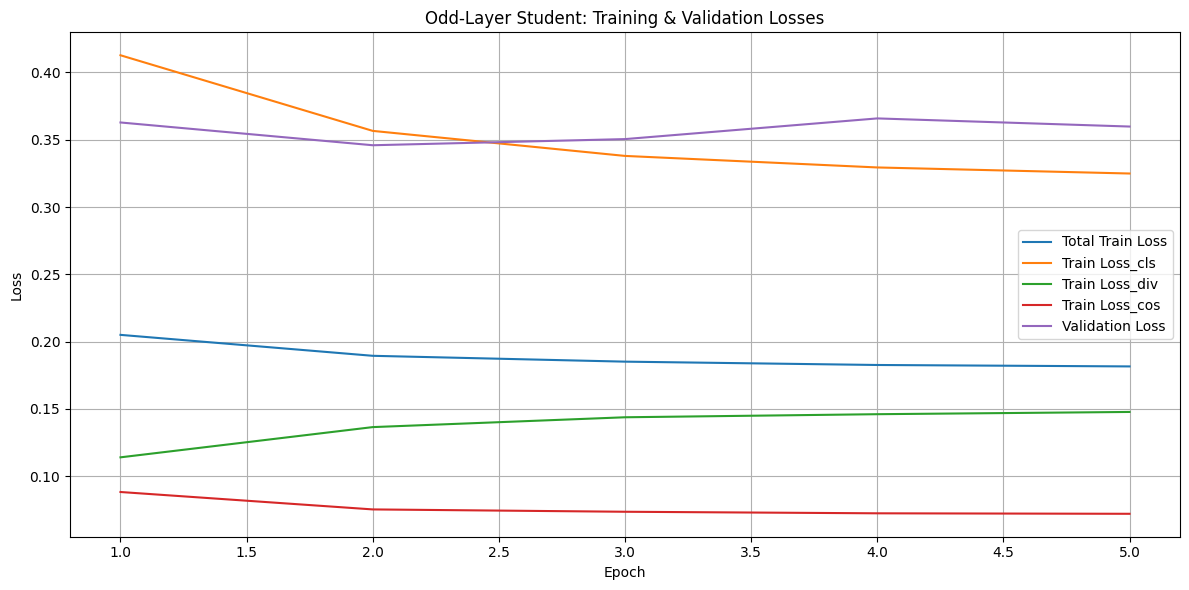

In [47]:
# Train odd-layer student
train_student_model(student_model_odd, optimizer_odd, scheduler_odd, model_name="Odd-Layer Student")



  0%|          | 0/1565 [00:00<?, ?it/s]

Epoch 1: Train Loss = 0.1834
   - Loss_cls: 0.3309
   - Loss_div: 0.1476
   - Loss_cos: 0.0717
Epoch 1: Eval Accuracy = 0.9507
Epoch 2: Train Loss = 0.1818
   - Loss_cls: 0.3268
   - Loss_div: 0.1484
   - Loss_cos: 0.0703
Epoch 2: Eval Accuracy = 0.9547
Epoch 3: Train Loss = 0.1805
   - Loss_cls: 0.3222
   - Loss_div: 0.1495
   - Loss_cos: 0.0697
Epoch 3: Eval Accuracy = 0.9513
Epoch 4: Train Loss = 0.1798
   - Loss_cls: 0.3210
   - Loss_div: 0.1496
   - Loss_cos: 0.0689
Epoch 4: Eval Accuracy = 0.9493
Epoch 5: Train Loss = 0.1795
   - Loss_cls: 0.3202
   - Loss_div: 0.1499
   - Loss_cos: 0.0685
Epoch 5: Eval Accuracy = 0.9500

 Even-Layer Student Avg Accuracy over 5 epochs: 0.9512
 Best Validation Accuracy: 0.9547
 Best model saved to /content/drive/MyDrive/Colab_Notebooks/A7/best_even-layer_student/model_weights.pt
 Tokenizer saved to /content/drive/MyDrive/Colab_Notebooks/A7/best_even-layer_student


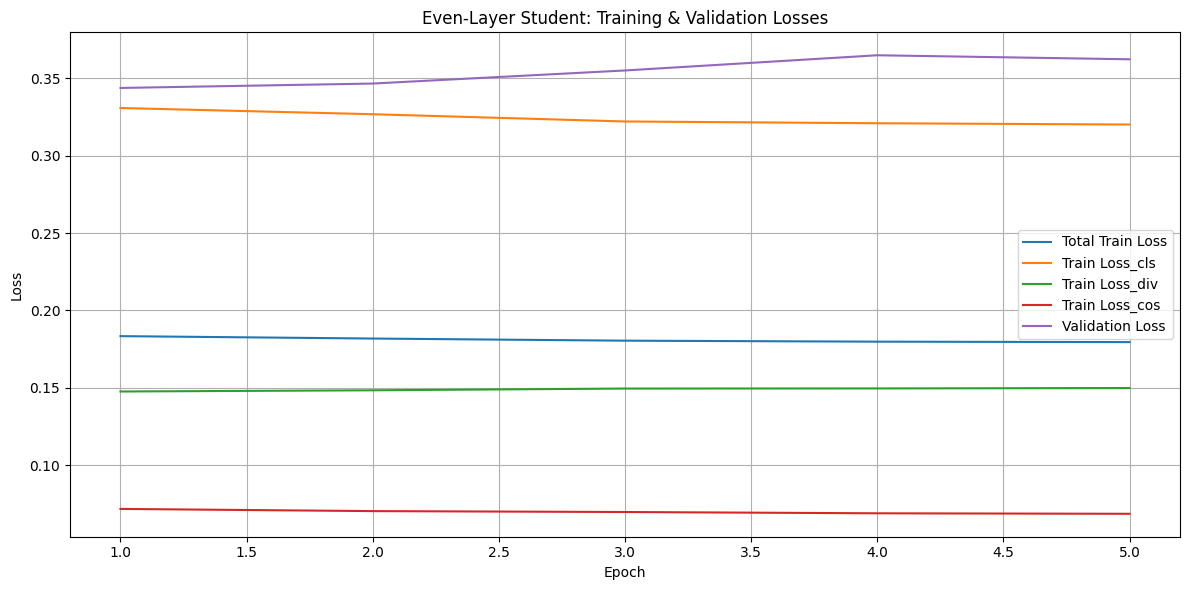

In [48]:
# Train even-layer student
train_student_model(student_model_even, optimizer_even, scheduler_even, model_name="Even-Layer Student")


### Appendix (Teacher Model)

In [49]:

import torch
from tqdm.auto import tqdm
import torch.optim as optim
import torch.nn as nn

# lr = 5e-5
# #training hyperparameters
# optimizer = optim.Adam(params=teacher_model.parameters(), lr=lr)

progress_bar = tqdm(range(num_training_steps))
eval_metrics = 0

for epoch in range(num_epochs):
    teacher_model.train()
    train_loss = 0
    for step, batch in enumerate(train_dataloader):
        batch = {k: v.to(device) for k, v in batch.items()}
        output_teacher = teacher_model(**batch)
        # cls loss
        loss = output_teacher.loss
        train_loss += loss.item()
        loss.backward()
        # accelerator.backward(loss)
        # Step with optimizer
        optimizer_teacher.step()
        lr_scheduler_teacher.step()
        optimizer_teacher.zero_grad()
        progress_bar.update(1)

    print(f'Epoch at {epoch+1}: Train loss {train_loss/len(train_dataloader):.4f}:')

    teacher_model.eval()
    for step, batch in enumerate(eval_dataloader):
        batch = {k: v.to(device) for k, v in batch.items()}
        with torch.no_grad():
            outputs = teacher_model(**batch)

        predictions = outputs.logits.argmax(dim=-1)
        # predictions, references = accelerator.gather((predictions, batch["labels"]))
        metric.add_batch(
            predictions=predictions,
            references=batch["labels"])

    eval_metric = metric.compute()
    eval_metrics += eval_metric['accuracy']
    print(f"Epoch at {epoch+1}: Test Acc {eval_metric['accuracy']:.4f}")

print('Avg Metric', eval_metrics/num_epochs)

  0%|          | 0/1565 [00:00<?, ?it/s]

Epoch at 1: Train loss 0.1437:
Epoch at 1: Test Acc 0.9627
Epoch at 2: Train loss 0.0592:
Epoch at 2: Test Acc 0.9600
Epoch at 3: Train loss 0.0166:
Epoch at 3: Test Acc 0.9607
Epoch at 4: Train loss 0.0049:
Epoch at 4: Test Acc 0.9560
Epoch at 5: Train loss 0.0015:
Epoch at 5: Test Acc 0.9593
Avg Metric 0.9597333333333333


##LORA (Low-Rank Adaptation)


In [50]:
# Load base BERT model (12-layer student)
lora_student = AutoModelForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=len(label_list),
    id2label=id2label,
    label2id=label2id
).to(device)



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [51]:
# LoRA config
lora_config = LoraConfig(
    r=8,
    lora_alpha=16,
    target_modules=["query", "key"],
    lora_dropout=0.1,
    bias="none",
    task_type=TaskType.SEQ_CLS
)

# Inject adapters into student model
lora_student = get_peft_model(lora_student, lora_config)
lora_student.print_trainable_parameters()  # Sanity check


trainable params: 296,450 || all params: 109,780,228 || trainable%: 0.2700


In [52]:
# Define optimizer & scheduler
optimizer_lora = optim.Adam(lora_student.parameters(), lr=5e-5)
scheduler_lora = get_scheduler(
    name="linear",
    optimizer=optimizer_lora,
    num_warmup_steps=0,
    num_training_steps=num_epochs * len(train_dataloader)
)


  0%|          | 0/1565 [00:00<?, ?it/s]

Epoch 1: Train Loss = 0.3470
   - Loss_cls: 0.3831
   - Loss_div: 0.3816
   - Loss_cos: 0.2763
Epoch 1: Eval Accuracy = 0.8787
Epoch 2: Train Loss = 0.2505
   - Loss_cls: 0.2796
   - Loss_div: 0.2783
   - Loss_cos: 0.1936
Epoch 2: Eval Accuracy = 0.9127
Epoch 3: Train Loss = 0.1857
   - Loss_cls: 0.2050
   - Loss_div: 0.2037
   - Loss_cos: 0.1484
Epoch 3: Eval Accuracy = 0.9207
Epoch 4: Train Loss = 0.1705
   - Loss_cls: 0.1886
   - Loss_div: 0.1874
   - Loss_cos: 0.1355
Epoch 4: Eval Accuracy = 0.9220
Epoch 5: Train Loss = 0.1648
   - Loss_cls: 0.1820
   - Loss_div: 0.1808
   - Loss_cos: 0.1316
Epoch 5: Eval Accuracy = 0.9253

 LoRA Student Avg Accuracy over 5 epochs: 0.9119
 Best Validation Accuracy: 0.9253
 Best model saved to /content/drive/MyDrive/Colab_Notebooks/A7/best_lora_student/model_weights.pt
 Tokenizer saved to /content/drive/MyDrive/Colab_Notebooks/A7/best_lora_student


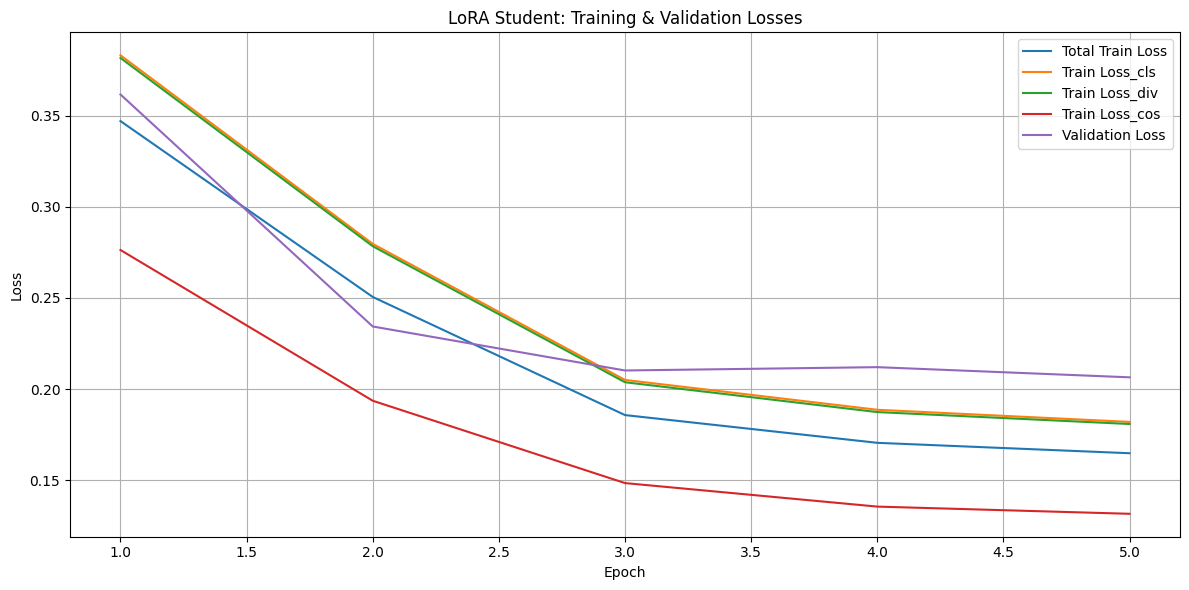

In [53]:
# Train LoRA-injected model
train_student_model(lora_student, optimizer_lora, scheduler_lora, model_name="LoRA Student")


## evaluation

In [54]:
def evaluate_model(model, dataloader, name="Model"):
    model.eval()
    metric = evaluate.load("accuracy")
    total_loss = 0

    for batch in dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        with torch.no_grad():
            outputs = model(**batch)

        predictions = outputs.logits.argmax(dim=-1)
        total_loss += outputs.loss.item()
        metric.add_batch(predictions=predictions, references=batch["labels"])

    result = metric.compute()
    avg_loss = total_loss / len(dataloader)
    print(f" {name} Accuracy: {result['accuracy']:.4f}, Avg Loss: {avg_loss:.4f}")
    return result['accuracy'], avg_loss


In [55]:
# Load best model manually if needed, or use current trained instance
evaluate_model(student_model_odd, test_dataloader, name="Odd Layer Student")
evaluate_model(student_model_even, test_dataloader, name="Even Layer Student")
evaluate_model(lora_student, test_dataloader, name="LoRA Student")


 Odd Layer Student Accuracy: 0.8887, Avg Loss: 0.4310
 Even Layer Student Accuracy: 0.8887, Avg Loss: 0.4310
 LoRA Student Accuracy: 0.9080, Avg Loss: 0.2393


(0.908, 0.23929247141201446)

In [ ]:
\

In [36]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from sklearn.metrics import classification_report
from transformers import AutoTokenizer, BertConfig, BertForSequenceClassification



In [37]:
def load_student_model(path, num_labels=2):
    # Load tokenizer
    tokenizer = AutoTokenizer.from_pretrained(path)

    # Load BERT base config and halve layers
    config = BertConfig.from_pretrained("bert-base-uncased")
    config.num_hidden_layers = 6
    config.num_labels = num_labels

    # Create new 6-layer model
    model = BertForSequenceClassification(config)
    model.load_state_dict(torch.load(os.path.join(path, "model_weights.pt"), map_location=device))
    model.to(device)
    model.eval()

    return model, tokenizer


In [38]:
from peft import PeftModel, LoraConfig, get_peft_model, TaskType
from transformers import AutoModelForSequenceClassification

def load_lora_model(path, num_labels=2):
    tokenizer = AutoTokenizer.from_pretrained(path)

    base_model = AutoModelForSequenceClassification.from_pretrained(
        "bert-base-uncased",
        num_labels=num_labels
    )

    # Re-inject LoRA adapter config (same as training)
    lora_config = LoraConfig(
        r=8,
        lora_alpha=16,
        target_modules=["query", "key"],
        lora_dropout=0.1,
        bias="none",
        task_type=TaskType.SEQ_CLS
    )

    model = get_peft_model(base_model, lora_config)
    model.load_state_dict(torch.load(os.path.join(path, "model_weights.pt"), map_location=device))
    model.to(device)
    model.eval()

    return model, tokenizer


In [39]:
def evaluate_model_with_f1(model, dataloader, name="Model"):
    model.eval()
    all_preds = []
    all_labels = []

    for batch in dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        with torch.no_grad():
            outputs = model(**batch)

        preds = outputs.logits.argmax(dim=-1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(batch["labels"].cpu().numpy())

    print(f"\n {name}")
    print(classification_report(all_labels, all_preds, target_names=["non-toxic", "toxic"]))


In [41]:
import os
# Paths
base_path = "/content/drive/MyDrive/Colab_Notebooks/A7"
odd_path = os.path.join(base_path, "best_odd-layer_student")
even_path = os.path.join(base_path, "best_even-layer_student")
lora_path = os.path.join(base_path, "best_lora_student")

# Load models
odd_model, odd_tokenizer = load_student_model(odd_path)
even_model, even_tokenizer = load_student_model(even_path)
lora_model, lora_tokenizer = load_lora_model(lora_path)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [44]:
# Load the dataset
dataset_name = "OxAISH-AL-LLM/wiki_toxic"
raw_datasets = datasets.load_dataset(dataset_name)

In [45]:
# Select and shuffle test split
raw_test_dataset = raw_datasets["test"].shuffle(seed=1150).select(range(1500))

# Extract raw text and labels
raw_test_texts = raw_test_dataset["comment_text"]
raw_test_labels = raw_test_dataset["label"]

In [50]:
# from datasets import Dataset
# from torch.utils.data import DataLoader

# def prepare_dataloader(tokenizer):
#     test_ds = Dataset.from_dict({"text": raw_test_texts, "labels": raw_test_labels})
#     tokenized = test_ds.map(lambda x: tokenizer(x["text"], truncation=True, padding=True), batched=True)
#     tokenized.set_format("torch")
#     return DataLoader(tokenized, batch_size=32)
from datasets import Dataset
from torch.utils.data import DataLoader

def prepare_dataloader(tokenizer, raw_texts, raw_labels):
    test_ds = Dataset.from_dict({
        "text": raw_texts,
        "labels": raw_labels
    })

    # Tokenize using tokenizer
    def tokenize(batch):
        return tokenizer(batch["text"], truncation=True, padding=True)

    tokenized_ds = test_ds.map(tokenize, batched=True)

    # 🔧 No need to rename "labels"
    tokenized_ds.set_format("torch", columns=["input_ids", "attention_mask", "labels"])
    return DataLoader(tokenized_ds, batch_size=32)



odd_test_loader = prepare_dataloader(odd_tokenizer, raw_test_texts, raw_test_labels)
even_test_loader = prepare_dataloader(even_tokenizer, raw_test_texts, raw_test_labels)
lora_test_loader = prepare_dataloader(lora_tokenizer, raw_test_texts, raw_test_labels)



Map:   0%|          | 0/1500 [00:00<?, ? examples/s]

Map:   0%|          | 0/1500 [00:00<?, ? examples/s]

Map:   0%|          | 0/1500 [00:00<?, ? examples/s]

In [51]:
evaluate_model_with_f1(odd_model, odd_test_loader, name="Odd-Layer Student")
evaluate_model_with_f1(even_model, even_test_loader, name="Even-Layer Student")
evaluate_model_with_f1(lora_model, lora_test_loader, name="LoRA Student")



 Odd-Layer Student
              precision    recall  f1-score   support

   non-toxic       0.93      0.99      0.96      1373
       toxic       0.61      0.21      0.32       127

    accuracy                           0.92      1500
   macro avg       0.77      0.60      0.64      1500
weighted avg       0.90      0.92      0.90      1500


 Even-Layer Student
              precision    recall  f1-score   support

   non-toxic       0.93      0.99      0.96      1373
       toxic       0.61      0.21      0.32       127

    accuracy                           0.92      1500
   macro avg       0.77      0.60      0.64      1500
weighted avg       0.90      0.92      0.90      1500


 LoRA Student
              precision    recall  f1-score   support

   non-toxic       0.92      0.98      0.95      1373
       toxic       0.35      0.13      0.19       127

    accuracy                           0.91      1500
   macro avg       0.64      0.56      0.57      1500
weighted avg      